In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson

In [10]:
data=pd.read_csv("zomato.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [8]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [16]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [20]:
#checking if we have duplicate records
duc_rec = data[data.duplicated()]

In [24]:
print(duc_rec.shape)
#dont have duplicate record

(0, 17)


In [ ]:
# DATA CLEANING

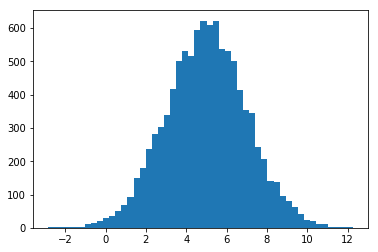

In [88]:
mu = 5.0
sigma = 2.0
values = np.random.normal(mu,sigma,10000)
plt.hist(values,50)
plt.show()

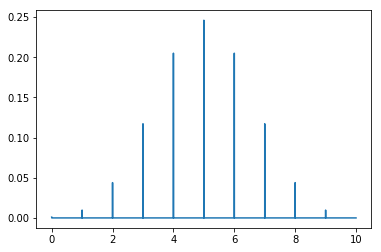

In [95]:
n,p = 10,0.5
x = np.arange(0,10,0.001)
plt.plot(x,binom.pmf(x,n,p))

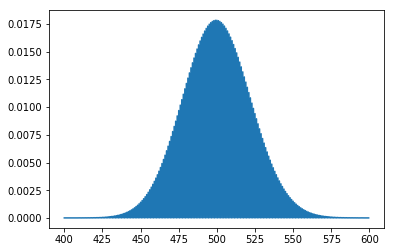

In [113]:
mu = 500
x = np.arange(400,600,0.5)
plt.plot(x,poisson.pmf(x,mu))

In [30]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

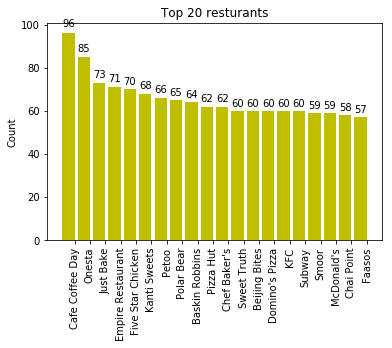

In [49]:
#resturnts with maximum chain
temp_series = data.name.value_counts()[:20]
labels= np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top 20 resturants")
autolabel(rects)
plt.show()

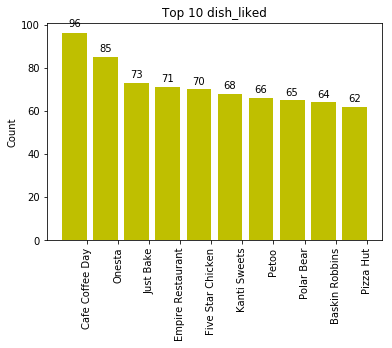

In [48]:
temp_series = data.name.value_counts()[:10]
labels= np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top 10 dish_liked")
autolabel(rects)
plt.show()

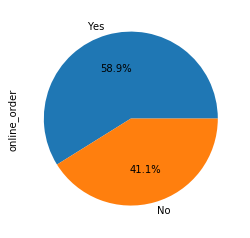

In [50]:
#percent of resturants accepting online orders
data['online_order'].value_counts().plot(kind='pie',autopct='%1.1f%%')

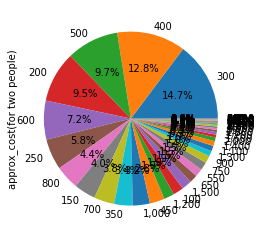

In [59]:
#percent of resturants accepting online orders
data['approx_cost(for two people)'].value_counts().plot(kind='pie',autopct='%1.1f%%')

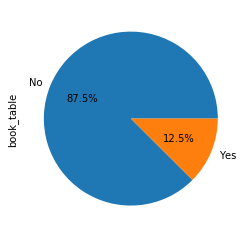

In [60]:
data['book_table'].value_counts().plot(kind='pie',autopct='%1.1f%%')

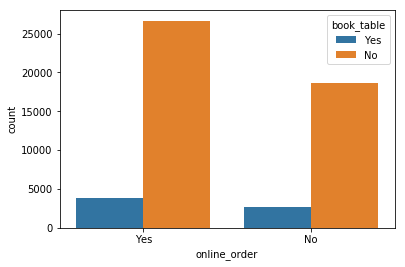

In [74]:
#online order vs rest_type
sns.countplot(x='online_order',data=data,hue='book_table')


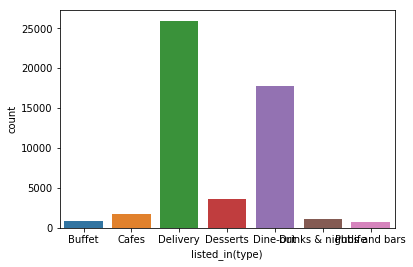

In [18]:
sns.countplot(x='listed_in(type)',data=data)

In [ ]:
#Distribution of ratings
plt.figure(figsize=(7,4))
rating=data['rate'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3)  else np.nan ).dropna()
sns.distplot(rating)

In [115]:
temp_df=data[['rate','approx_cost(for two people)','online_order','rest_type','name']].dropna()
temp_df['rate']=temp_df['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)
temp_df['approx_cost(for two people)']=temp_df['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))

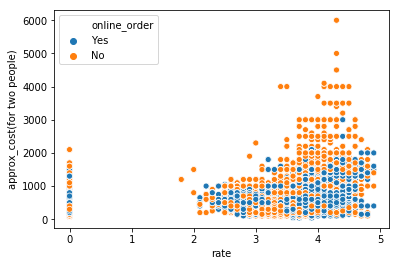

In [116]:
#Online Order option against Cost for two people
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=temp_df)
plt.show()

Text(0.5, 0, 'count')

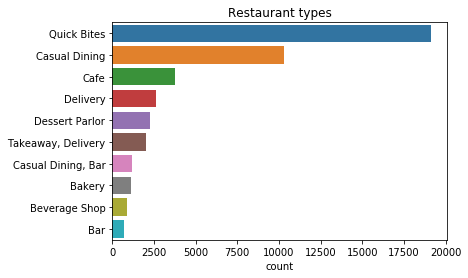

In [119]:
#Count of each Resturant Types
rest=data['rest_type'].value_counts()[:10]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

Text(0.5, 1.0, 'List of popular Cusines')

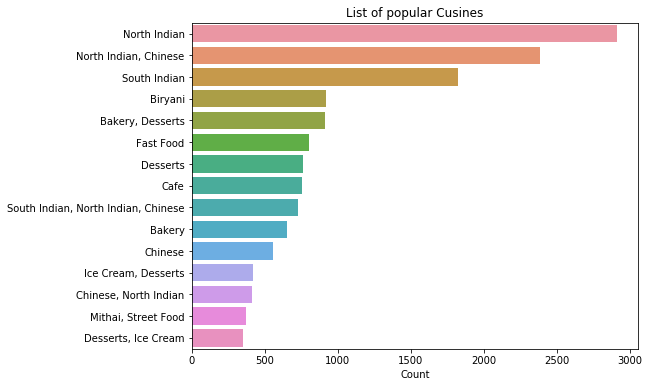

In [128]:
#Popular Cusines 
plt.figure(figsize=(8,6))
cuisines=data['cuisines'].value_counts()[:15]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("List of popular Cusines")

Text(0.5, 1.0, ' dish_liked')

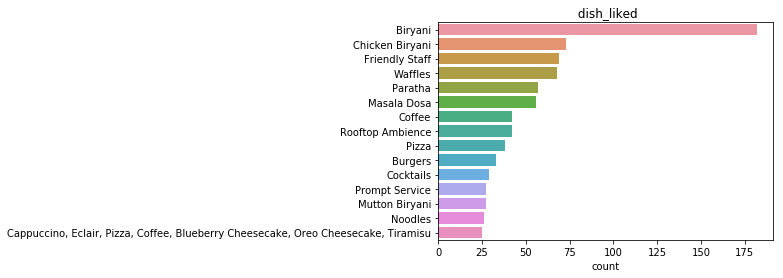

In [132]:
#most liked dish
dish_liked = data["dish_liked"].value_counts()[:15]
sns.barplot(dish_liked,dish_liked.index)
plt.xlabel("count")
plt.title(" dish_liked")

In [136]:
#Top rated dish
name_rating=temp_df[['name','rate']].groupby(['rate'], sort = True)
name_rating=name_rating.filter(lambda x: x['rate'].mean() >= 4.5)
name_rating=name_rating.sort_values(by=['rate'])
name_rating

,name,rate
30533,Natural Ice Cream,4.5
26872,Stoner,4.5
38468,XO Belgian Waffle,4.5
38456,Fabelle Chocolate Boutique - ITC Gardenia,4.5
27000,Pasta Street,4.5
27011,Toscano,4.5
27047,Brooks and Bonds Brewery,4.5
27138,Mudpipe Cafe,4.5
27303,Bonum cibum,4.5
26860,Pin Me Down,4.5
